## 2. Spectrum of Logistic Map

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### a)

In [0]:
def logistic_map(mu, u):
    return mu * u * (1 - u)

def logistic_seq(mu, u0=.1, n=10, windup=0):
    u = u0
    for i in range(windup):
        u = logistic_map(mu, u)
    out = []
    for i in range(n):
        u = logistic_map(mu, u)
        out.append(u)
    return(out)

#### i)

In [0]:
mus = [3.3, 3.5, 3.56, 3.57, 3.826, 3.83, 3.8494]
u0 = .1
windup = 1000
iters = 2**14

In [0]:
sequences = {}
for mu in mus:
    sequences[mu] = logistic_seq(mu, u0, iters, windup)

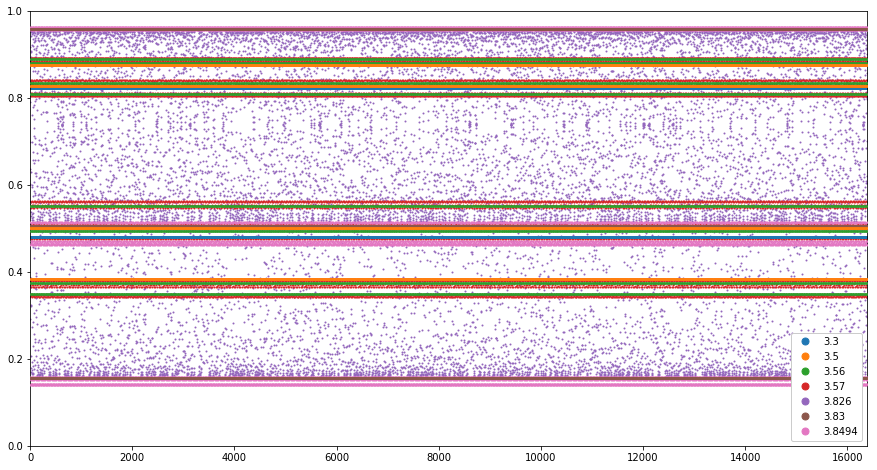

In [39]:
fig = plt.figure()
ax = plt.subplot()

mu_order = [3.826, 3.57, 3.3, 3.8494, 3.83, 3.56, 3.5]

for mu, seq in sequences.items():
    ax.plot(seq, linestyle='none', marker='.', markersize=2, label=mu, zorder=mu_order.index(mu))
ax.legend(markerscale=7, loc=4, framealpha=1)

ax.set_xlim(0, iters)
ax.set_ylim(0, 1)

fig.set_size_inches(15,8)
plt.show()

#### ii)

In [0]:
spectra = {}
for mu, seq in sequences.items():
    spec = np.fft.rfft(seq)[1:-1]
    spectra[mu] = np.abs(spec)**2
    
freq = np.fft.rfftfreq(iters)[1:-1]

In [41]:
len(freq)

8191

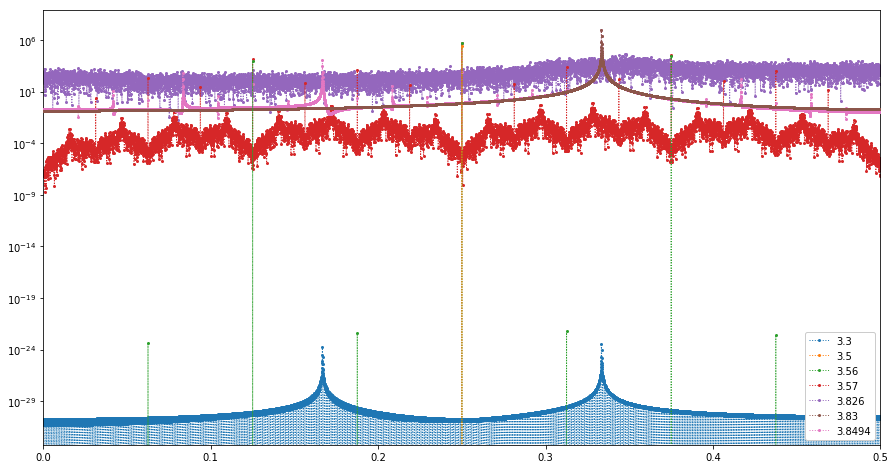

In [42]:
fig = plt.figure()
ax = plt.subplot()

mu_order = [3.826, 3.57, 3.3, 3.8494, 3.83, 3.56, 3.5]

for mu, spec in spectra.items():
    ax.plot(freq, spec, label=mu, linestyle='dotted', marker='.', markersize=4, linewidth=1, zorder=mu_order.index(mu))
ax.legend(loc=4, framealpha=1)
ax.set_yscale('log')
ax.set_xlim(0, freq[-1])

fig.set_size_inches(15,8)
plt.show()

#### iii)

In [0]:
mus = 3.83
u0 = .1
windup = 1000
iters = 3 * 2**14

In [0]:
seq = logistic_seq(mu, u0, iters, windup)
spec = np.abs(np.fft.rfft(seq))[1:-1]**2
new_freq = np.fft.rfftfreq(iters)[1:-1]

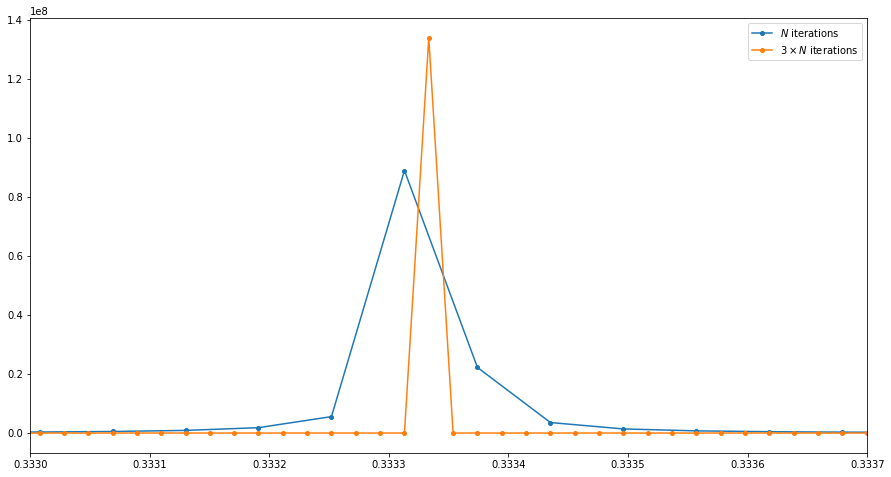

In [45]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(freq, spectra[3.83]*9, marker='.', markersize=8, label=r'$N$ iterations')
ax.plot(new_freq, spec, marker='.', markersize=8, label=r'$3 \times N$ iterations')

ax.legend()

ax.set_xlim(.333, .3337)

fig.set_size_inches(15,8)
plt.show()

### b)

In [0]:
mu = 3.
u0 = .1
windup = 1
iters = 2**17

In [0]:
seq = logistic_seq(mu, u0, iters, windup)
spec = np.abs(np.fft.rfft(seq))[1:-1]**2
freq = np.fft.rfftfreq(iters)[1:-1]

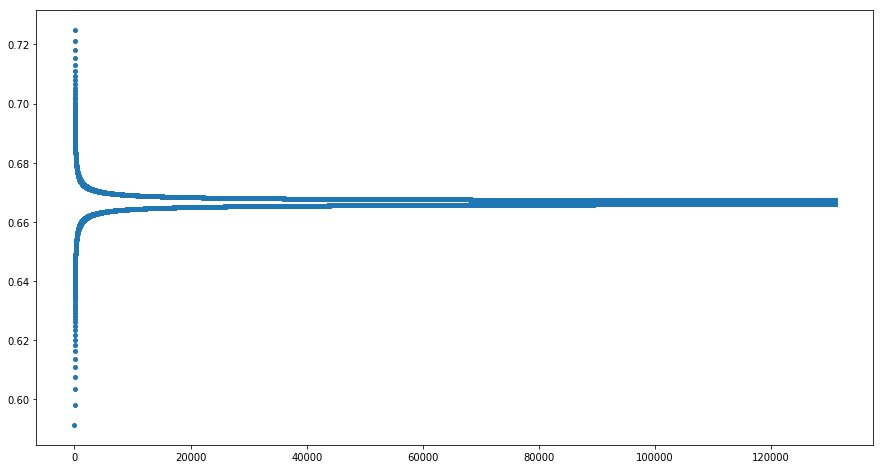

In [55]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(seq, linestyle='none', marker='.', markersize=8)

fig.set_size_inches(15,8)
plt.show()

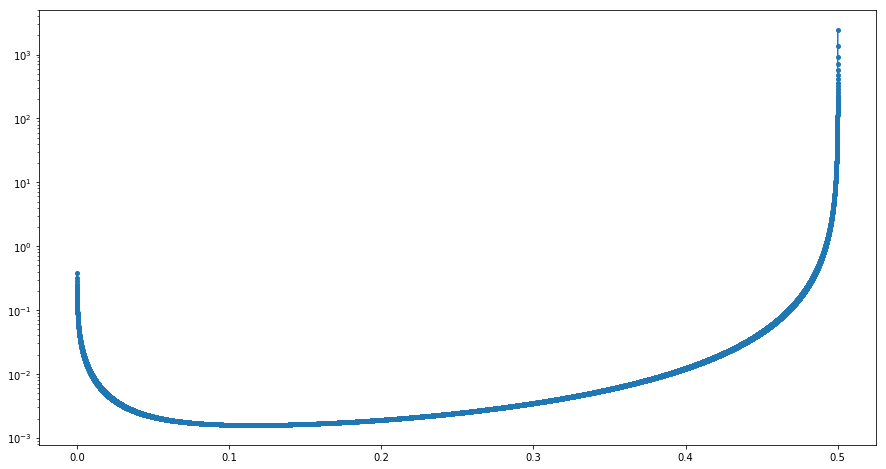

In [57]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(freq, spec, marker='.', markersize=8)

ax.set_yscale('log')

fig.set_size_inches(15,8)
plt.show()